# Setup

In [1]:
# import modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import nltk
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer

ModuleNotFoundError: No module named 'numpy'

In [5]:
results_df = pd.read_csv('../../data/topic_model_results.csv',  lineterminator='\n', encoding='utf8')
results_df.head()

,text,timestamp,username,link,link_id,parent_id,id,subreddit_id,moderation\r,hateful Score,hateful HR,toxic Score,toxic HR\r,Topic Number,Topic\r
0,i think most singaporeans dont give a damn who...,11/4/2020 15:49,invigo79,/r/singapore/comments/fz7vtl/im_quite_interest...,t3_fz7vtl,t3_fz7vtl,fn3gbrg,t5_2qh8c,"{'removal_reason': None, 'collapsed': False, '...",-0.582897,0,-0.419338,0,0,Political\r
1,fair point the secrecy aspect of it slipped my...,3/4/2020 9:59,potatetoe_tractor,/r/singapore/comments/fu3axm/government_to_tab...,t3_fu3axm,t1_fmasya5,fmau5k3,t5_2qh8c,"{'removal_reason': None, 'collapsed': False, '...",-1.116736,0,-1.869363,0,4,Relationships\r
2,range,15/2/2020 15:07,CrossfittJesus,/r/singapore/comments/f4ac70/what_is_ps_defens...,t3_f4ac70,t3_f4ac70,fhp05xc,t5_2qh8c,"{'removal_reason': None, 'collapsed': False, '...",-1.027191,0,-0.798016,0,4,Relationships\r
3,gt this is binary thinking because you think t...,4/6/2020 7:07,nomad80,/r/singapore/comments/gw55cx/notoracism/fsu4fyd/,t3_gw55cx,t1_fsu3dsf,fsu4fyd,t5_2qh8c,"{'removal_reason': None, 'collapsed': False, '...",-0.419287,0,1.119165,1,5,Crime\r
4,boo boo poor u lmao,31/10/2020 13:52,pirorok,/r/singapore/comments/jl6abo/rsingapore_random...,t3_jl6abo,t1_gap4e9y,gap4vkl,t5_2qh8c,"{'removal_reason': None, 'collapsed': False, '...",-0.952112,0,1.197503,1,9,Unknown\r


In [6]:
# Remove \r from column names
results_df.columns = results_df.columns.str.strip()

# Strip \r and other whitespace characters from a specific column (e.g., 'column_name')
results_df['Topic'] = results_df['Topic'].str.strip()

results_df.head()

,text,timestamp,username,link,link_id,parent_id,id,subreddit_id,moderation,hateful Score,hateful HR,toxic Score,toxic HR,Topic Number,Topic
0,i think most singaporeans dont give a damn who...,11/4/2020 15:49,invigo79,/r/singapore/comments/fz7vtl/im_quite_interest...,t3_fz7vtl,t3_fz7vtl,fn3gbrg,t5_2qh8c,"{'removal_reason': None, 'collapsed': False, '...",-0.582897,0,-0.419338,0,0,Political
1,fair point the secrecy aspect of it slipped my...,3/4/2020 9:59,potatetoe_tractor,/r/singapore/comments/fu3axm/government_to_tab...,t3_fu3axm,t1_fmasya5,fmau5k3,t5_2qh8c,"{'removal_reason': None, 'collapsed': False, '...",-1.116736,0,-1.869363,0,4,Relationships
2,range,15/2/2020 15:07,CrossfittJesus,/r/singapore/comments/f4ac70/what_is_ps_defens...,t3_f4ac70,t3_f4ac70,fhp05xc,t5_2qh8c,"{'removal_reason': None, 'collapsed': False, '...",-1.027191,0,-0.798016,0,4,Relationships
3,gt this is binary thinking because you think t...,4/6/2020 7:07,nomad80,/r/singapore/comments/gw55cx/notoracism/fsu4fyd/,t3_gw55cx,t1_fsu3dsf,fsu4fyd,t5_2qh8c,"{'removal_reason': None, 'collapsed': False, '...",-0.419287,0,1.119165,1,5,Crime
4,boo boo poor u lmao,31/10/2020 13:52,pirorok,/r/singapore/comments/jl6abo/rsingapore_random...,t3_jl6abo,t1_gap4e9y,gap4vkl,t5_2qh8c,"{'removal_reason': None, 'collapsed': False, '...",-0.952112,0,1.197503,1,9,Unknown


In [7]:
# rename new columns
results_df.rename(columns={
    'hateful Score': 'hateful_score',
    'hateful HR': 'hateful_prediction',
    'toxic Score': 'toxic_score',
    'toxic HR': 'toxic_prediction',
    'Topic Number': 'topic_number',
    'Topic': 'topic'
}, inplace=True)

results_df.head()

,text,timestamp,username,link,link_id,parent_id,id,subreddit_id,moderation,hateful_score,hateful_prediction,toxic_score,toxic_prediction,topic_number,topic
0,i think most singaporeans dont give a damn who...,11/4/2020 15:49,invigo79,/r/singapore/comments/fz7vtl/im_quite_interest...,t3_fz7vtl,t3_fz7vtl,fn3gbrg,t5_2qh8c,"{'removal_reason': None, 'collapsed': False, '...",-0.582897,0,-0.419338,0,0,Political
1,fair point the secrecy aspect of it slipped my...,3/4/2020 9:59,potatetoe_tractor,/r/singapore/comments/fu3axm/government_to_tab...,t3_fu3axm,t1_fmasya5,fmau5k3,t5_2qh8c,"{'removal_reason': None, 'collapsed': False, '...",-1.116736,0,-1.869363,0,4,Relationships
2,range,15/2/2020 15:07,CrossfittJesus,/r/singapore/comments/f4ac70/what_is_ps_defens...,t3_f4ac70,t3_f4ac70,fhp05xc,t5_2qh8c,"{'removal_reason': None, 'collapsed': False, '...",-1.027191,0,-0.798016,0,4,Relationships
3,gt this is binary thinking because you think t...,4/6/2020 7:07,nomad80,/r/singapore/comments/gw55cx/notoracism/fsu4fyd/,t3_gw55cx,t1_fsu3dsf,fsu4fyd,t5_2qh8c,"{'removal_reason': None, 'collapsed': False, '...",-0.419287,0,1.119165,1,5,Crime
4,boo boo poor u lmao,31/10/2020 13:52,pirorok,/r/singapore/comments/jl6abo/rsingapore_random...,t3_jl6abo,t1_gap4e9y,gap4vkl,t5_2qh8c,"{'removal_reason': None, 'collapsed': False, '...",-0.952112,0,1.197503,1,9,Unknown


In [8]:
# convert data to appropriate datatypes
results_df['text'] = results_df['text'].astype(str)
results_df['timestamp'] = pd.to_datetime(results_df['timestamp'], format='%d/%m/%Y %H:%M')
results_df['username'] = results_df['username'].astype(str)
results_df['link'] = results_df['link'].astype(str)
results_df['link_id'] = results_df['link_id'].astype(str)
results_df['parent_id'] = results_df['parent_id'].astype(str)
results_df['id'] = results_df['id'].astype(str)
results_df['subreddit_id'] = results_df['subreddit_id'].astype(str)
results_df['moderation'] = results_df['moderation'].tolist()
results_df['hateful_score'] = results_df['hateful_score'].astype('float32')
results_df['hateful_prediction'] = results_df['hateful_prediction'].astype('int16')
results_df['toxic_score'] = results_df['toxic_score'].astype('float32')
results_df['toxic_prediction'] = results_df['toxic_prediction'].astype('int16')
results_df['topic_number'] = results_df['topic_number'].astype('category')
results_df['topic'] = results_df['topic'].astype('category')

In [9]:
# extract date from datetime stamp
results_df['timestamp'] = results_df['timestamp'].dt.date
results_df['timestamp'].head()

0    2020-04-11
1    2020-04-03
2    2020-02-15
3    2020-06-04
4    2020-10-31
Name: timestamp, dtype: object

# Analysis

From our EDA, we found out some spikes in comments which we inferred were about big events like the General Elections in 2020, affairs between politicians, COVID-19, and the River Valley High School killing. These fall under the topics of Politics, COVID-19 and Crime, which we focus on analysing.

In [18]:
results_df.head()

,text,timestamp,username,link,link_id,parent_id,id,subreddit_id,moderation,hateful_score,hateful_prediction,toxic_score,toxic_prediction,topic_number,topic
0,i think most singaporeans dont give a damn who...,2020-04-11,invigo79,/r/singapore/comments/fz7vtl/im_quite_interest...,t3_fz7vtl,t3_fz7vtl,fn3gbrg,t5_2qh8c,"{'removal_reason': None, 'collapsed': False, '...",-0.582897,0,-0.419338,0,0,Political
1,fair point the secrecy aspect of it slipped my...,2020-04-03,potatetoe_tractor,/r/singapore/comments/fu3axm/government_to_tab...,t3_fu3axm,t1_fmasya5,fmau5k3,t5_2qh8c,"{'removal_reason': None, 'collapsed': False, '...",-1.116736,0,-1.869363,0,4,Relationships
2,range,2020-02-15,CrossfittJesus,/r/singapore/comments/f4ac70/what_is_ps_defens...,t3_f4ac70,t3_f4ac70,fhp05xc,t5_2qh8c,"{'removal_reason': None, 'collapsed': False, '...",-1.027191,0,-0.798016,0,4,Relationships
3,gt this is binary thinking because you think t...,2020-06-04,nomad80,/r/singapore/comments/gw55cx/notoracism/fsu4fyd/,t3_gw55cx,t1_fsu3dsf,fsu4fyd,t5_2qh8c,"{'removal_reason': None, 'collapsed': False, '...",-0.419287,0,1.119165,1,5,Crime
4,boo boo poor u lmao,2020-10-31,pirorok,/r/singapore/comments/jl6abo/rsingapore_random...,t3_jl6abo,t1_gap4e9y,gap4vkl,t5_2qh8c,"{'removal_reason': None, 'collapsed': False, '...",-0.952112,0,1.197503,1,9,Unknown


## Big spike events compared to normal, everyday events

We hypothesise that big spike events would correspond to higher hatefulness and toxicity.

### Comparison of hatefulness of topics

In [40]:
# Count total entries per category
topic_counts = results_df['topic'].value_counts()

# Count entries that fulfill the criteria (Score == 1)
hatefulness_counts = results_df[results_df['hateful_prediction'] == 1]['topic'].value_counts()

# Combine the counts into a DataFrame
hate_counts_df = pd.DataFrame({
    'total': topic_counts,
    'hateful': hatefulness_counts
}).fillna(0)  # Fill NaN values with 0 for categories with no inner counts

# Calculate proportion
hate_counts_df['proportion_hateful'] = hate_counts_df['hateful'] / hate_counts_df['total']
hate_counts_df = hate_counts_df.reset_index().rename(columns = {'index': 'topic'})
hate_counts_df.sort_values(by = 'proportion_hateful', ascending = False)

,topic,total,hateful,proportion_hateful
8,Unknown,79771,1027,0.012874
1,Crime,46975,588,0.012517
2,Education,33762,410,0.012144
6,Relationships,34657,403,0.011628
7,Transport,31380,359,0.011440
5,Race & Religion,51109,576,0.011270
4,Political,34519,389,0.011269
9,Work,19009,214,0.011258
3,Housing,27467,295,0.010740
0,Covid-19,37649,377,0.010014


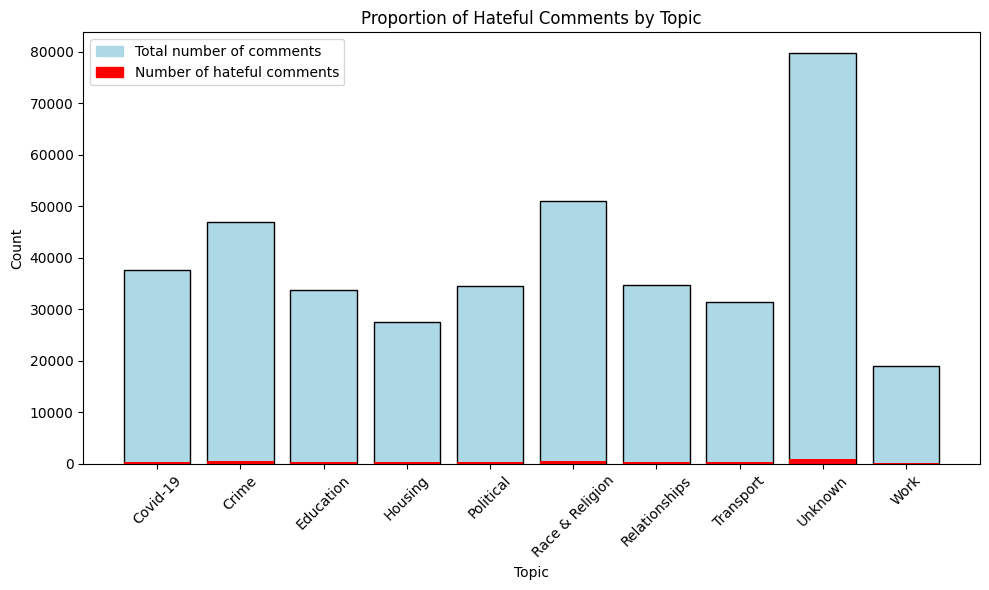

In [41]:
# Set figure size
plt.figure(figsize=(10, 6))

# Create bars
bars = plt.bar(hate_counts_df['topic'], hate_counts_df['total'], color = 'lightblue', edgecolor = 'black', label = 'Total number of comments')

# Add inner bars for the proportion
for bar, hate_count in zip(bars, hate_counts_df['hateful']):
    height = bar.get_height()
    hate_bar_height = hate_count
    
    # Draw inner bar
    plt.bar(bar.get_x() + bar.get_width()/2, hate_bar_height, width=bar.get_width(), color='red', label = 'Number of hateful comments')

# Labels and title
plt.xlabel('Topic')
plt.ylabel('Count')
plt.title('Proportion of Hateful Comments by Topic')
plt.xticks(rotation=45)
handles = [plt.Rectangle((0,0),1,1, color='lightblue'), plt.Rectangle((0,0),1,1, color='red')]
plt.legend(handles, ['Total number of comments', 'Number of hateful comments'])
plt.tight_layout()
plt.show()


As seen in both the `hate_counts_df` table and the bar plot, there is no distinguishable difference in proportion of hateful comments for any topic.

In [39]:
# calculate the average hateful score for each category
hateful_avg = results_df.groupby('topic')['hateful_score'].mean().reset_index()
sorted_hateful_avg = hateful_avg.sort_values(by = 'hateful_score', ascending = False)
sorted_hateful_avg

/var/folders/3v/wqs0tv2d5lx83t5kmv4kx_zr0000gn/T/ipykernel_20587/2340912962.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  hateful_avg = results_df.groupby('topic')['hateful_score'].mean().reset_index()


,topic,hateful_score
8,Unknown,-0.960016
2,Education,-0.967761
9,Work,-0.968115
6,Relationships,-0.968313
0,Covid-19,-0.968609
5,Race & Religion,-0.969118
7,Transport,-0.969834
1,Crime,-0.970119
4,Political,-0.971467
3,Housing,-0.972205


There is also not any distinct difference for the average `hateful_score` for any topic.

### Comparison of toxicity of topics

In [43]:
# Count total entries per category
topic_counts = results_df['topic'].value_counts()

# Count entries that fulfill the criteria (Score == 1)
toxic_counts = results_df[results_df['toxic_prediction'] == 1]['topic'].value_counts()

# Combine the counts into a DataFrame
toxic_counts_df = pd.DataFrame({
    'total': topic_counts,
    'toxic': toxic_counts
}).fillna(0)  # Fill NaN values with 0 for categories with no inner counts

# Calculate proportion
toxic_counts_df['proportion_toxic'] = toxic_counts_df['toxic'] / toxic_counts_df['total']
toxic_counts_df = toxic_counts_df.reset_index().rename(columns = {'index': 'topic'})
toxic_counts_df.sort_values(by = 'proportion_toxic', ascending = False)

,topic,total,toxic,proportion_toxic
8,Unknown,79771,14002,0.175527
0,Covid-19,37649,6118,0.162501
9,Work,19009,3056,0.160766
7,Transport,31380,5040,0.160612
2,Education,33762,5422,0.160595
1,Crime,46975,7512,0.159915
5,Race & Religion,51109,8150,0.159463
6,Relationships,34657,5497,0.158612
3,Housing,27467,4264,0.155241
4,Political,34519,5343,0.154784


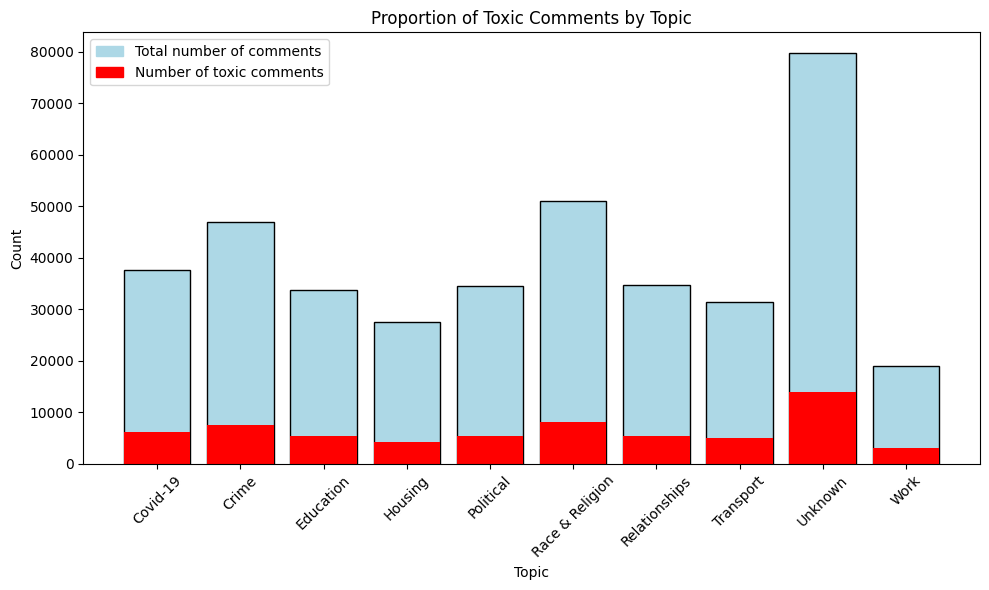

In [44]:
# Set figure size
plt.figure(figsize=(10, 6))

# Create bars
bars = plt.bar(toxic_counts_df['topic'], toxic_counts_df['total'], color = 'lightblue', edgecolor = 'black', label = 'Total number of comments')

# Add inner bars for the proportion
for bar, toxic_count in zip(bars, toxic_counts_df['toxic']):
    height = bar.get_height()
    toxic_bar_height = toxic_count
    
    # Draw inner bar
    plt.bar(bar.get_x() + bar.get_width()/2, toxic_bar_height, width=bar.get_width(), color='red', label = 'Number of toxic comments')

# Labels and title
plt.xlabel('Topic')
plt.ylabel('Count')
plt.title('Proportion of Toxic Comments by Topic')
plt.xticks(rotation=45)
handles = [plt.Rectangle((0,0),1,1, color='lightblue'), plt.Rectangle((0,0),1,1, color='red')]
plt.legend(handles, ['Total number of comments', 'Number of toxic comments'])
plt.tight_layout()
plt.show()

As seen in both the `toxic_counts_df` table and the bar plot, there is no distinguishable difference in proportion of hateful comments for any topic.

In [45]:
# calculate the average hateful score for each category
toxic_avg = results_df.groupby('topic')['toxic_score'].mean().reset_index()
sorted_toxic_avg = toxic_avg.sort_values(by = 'toxic_score', ascending = False)
sorted_toxic_avg

/var/folders/3v/wqs0tv2d5lx83t5kmv4kx_zr0000gn/T/ipykernel_20587/1816459163.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  toxic_avg = results_df.groupby('topic')['toxic_score'].mean().reset_index()


,topic,toxic_score
8,Unknown,-0.445050
0,Covid-19,-0.472685
2,Education,-0.477676
7,Transport,-0.478342
6,Relationships,-0.480626
1,Crime,-0.480970
5,Race & Religion,-0.481562
9,Work,-0.481812
3,Housing,-0.486003
4,Political,-0.486639


There is also not any distinct difference for the average `toxic_score` for any topic.

## Comparison among different big spike events

We filter the topics of big spike events (Political, Covid-19, Crime) to analyse the hatefulness and toxicity of these comments and compare them.

In [58]:
# getting the topics 'Political', 'Covid-19' and 'Crime'
big_spike_events = results_df[(results_df["topic_number"] == 0) | (results_df["topic_number"] == 1) | (results_df["topic_number"] == 5)]
big_spike_events

,text,timestamp,username,link,link_id,parent_id,id,subreddit_id,moderation,hateful_score,hateful_prediction,toxic_score,toxic_prediction,topic_number,topic
0,i think most singaporeans dont give a damn who...,2020-04-11,invigo79,/r/singapore/comments/fz7vtl/im_quite_interest...,t3_fz7vtl,t3_fz7vtl,fn3gbrg,t5_2qh8c,"{'removal_reason': None, 'collapsed': False, '...",-0.582897,0,-0.419338,0,0,Political
3,gt this is binary thinking because you think t...,2020-06-04,nomad80,/r/singapore/comments/gw55cx/notoracism/fsu4fyd/,t3_gw55cx,t1_fsu3dsf,fsu4fyd,t5_2qh8c,"{'removal_reason': None, 'collapsed': False, '...",-0.419287,0,1.119165,1,5,Crime
6,because she is angry that despite all the hard...,2021-10-24,StareintotheSun2020,/r/singapore/comments/qeu001/deleted_by_user/h...,t3_qeu001,t1_hhw1usq,hhwhn2u,t5_2qh8c,"{'collapsed_reason_code': None, 'collapsed_rea...",-0.922030,0,0.315608,1,0,Political
7,sometimes there are restrictions on how often ...,2020-04-03,pm_me_pm_speeches,/r/singapore/comments/fu4ch0/pm_lee_announces_...,t3_fu4ch0,t1_fmaw7ot,fmb0nae,t5_2qh8c,"{'removal_reason': None, 'collapsed': False, '...",-1.213591,0,-1.785314,0,5,Crime
8,oo yup thats probably the case im on mobile,2020-07-14,charroxgrin,/r/singapore/comments/hqowfd/rsingapore_random...,t3_hqowfd,t1_fy05ccz,fy05ljb,t5_2qh8c,"{'removal_reason': None, 'collapsed': False, '...",-1.126568,0,-0.934198,0,0,Political
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
347593,gtmuis will come under pressure then\n\nperson...,2023-03-13,tryingmydarnest,/r/singapore/comments/11pj787/news_analysis_re...,t3_11pj787,t1_jc0ndse,jc0q3xf,t5_2qh8c,"{'controversiality': 0, 'collapsed_reason_code...",-0.895473,0,-0.837096,0,5,Crime
347594,lets not get there yet i mean repealing of 377...,2022-08-19,[deleted],/r/singapore/comments/ws9a1z/cna_explains_the_...,t3_ws9a1z,t1_ikxvvls,ikypk2u,t5_2qh8c,"{'controversiality': 0, 'collapsed_reason_code...",-0.746425,0,-0.313047,0,1,Covid-19
347596,\nhello i said that first,2022-01-04,Mr_QQ-10,/r/SingaporeRaw/comments/rtj6wj/greenery_at_si...,t3_rtj6wj,t1_hqwx1s4,hr7537j,t5_xnx04,"{'controversiality': 0, 'collapsed_reason_code...",-0.939330,0,-0.387483,0,5,Crime
347597,then those nonchinese speakers how ah,2023-02-16,MangoDangoLango,/r/singapore/comments/113cb5a/rsingapore_rando...,t3_113cb5a,t1_j8q6lp0,j8qnt3w,t5_2qh8c,"{'controversiality': 0, 'collapsed_reason_code...",-0.514265,0,0.143384,1,1,Covid-19


### Comparison of the hatefulness and toxicity among the 3 topics of the big spike events

In [64]:
# by proportion of hateful/toxic comments
proportions = big_spike_events.groupby('topic').agg(
    hateful_proportion = ('hateful_prediction', 'mean'),
    toxic_proportion = ('toxic_prediction', 'mean')
).reset_index()
proportions = proportions.dropna()
proportions

/var/folders/3v/wqs0tv2d5lx83t5kmv4kx_zr0000gn/T/ipykernel_20587/2627268725.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  proportions = big_spike_events.groupby('topic').agg(


,topic,hateful_proportion,toxic_proportion
0,Covid-19,0.010014,0.162501
1,Crime,0.012517,0.159915
4,Political,0.011269,0.154784


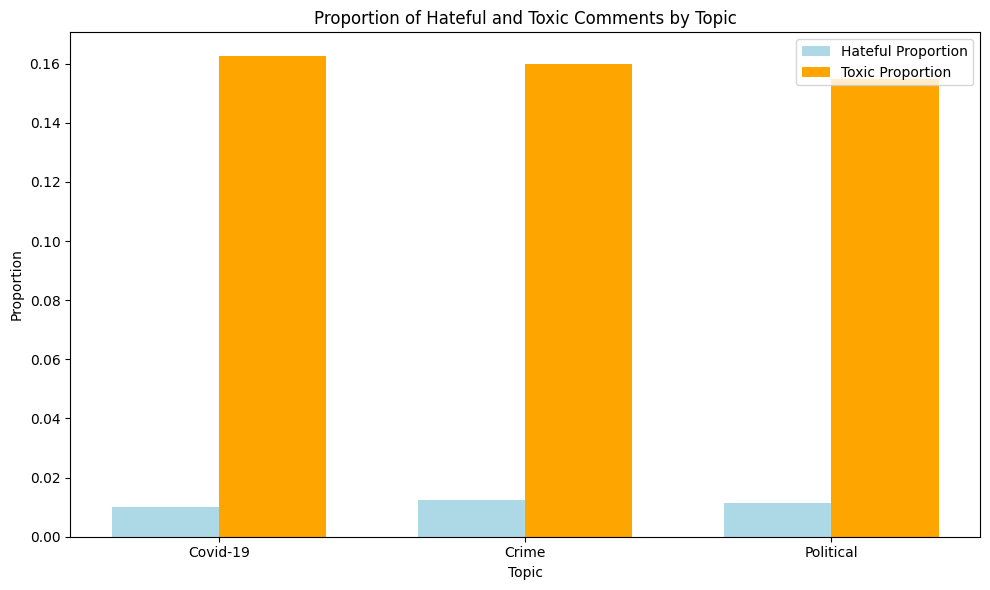

In [65]:
# Set figure size
plt.figure(figsize=(10, 6))

# Define bar width
bar_width = 0.35

# Set positions of the bars on the x-axis
x = np.arange(len(proportions))

# Create bars for proportion of hateful and toxic comments
plt.bar(x - bar_width/2, proportions['hateful_proportion'], width=bar_width, label='Hateful Proportion', color='lightblue')
plt.bar(x + bar_width/2, proportions['toxic_proportion'], width=bar_width, label='Toxic Proportion', color='orange')

# Adding labels and title
plt.xlabel('Topic')
plt.ylabel('Proportion')
plt.title('Proportion of Hateful and Toxic Comments by Topic')
plt.xticks(x, proportions['topic'])
plt.legend()

# Show plot
plt.tight_layout()
plt.show()


In [66]:
# by average hateful/toxic score
scores = big_spike_events.groupby('topic').agg(
    hateful_score = ('hateful_score', 'mean'),
    toxic_score = ('toxic_score', 'mean')
).reset_index()
scores = scores.dropna()
scores

/var/folders/3v/wqs0tv2d5lx83t5kmv4kx_zr0000gn/T/ipykernel_20587/4125757836.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  scores = big_spike_events.groupby('topic').agg(


,topic,hateful_score,toxic_score
0,Covid-19,-0.968609,-0.472685
1,Crime,-0.970119,-0.480970
4,Political,-0.971467,-0.486639


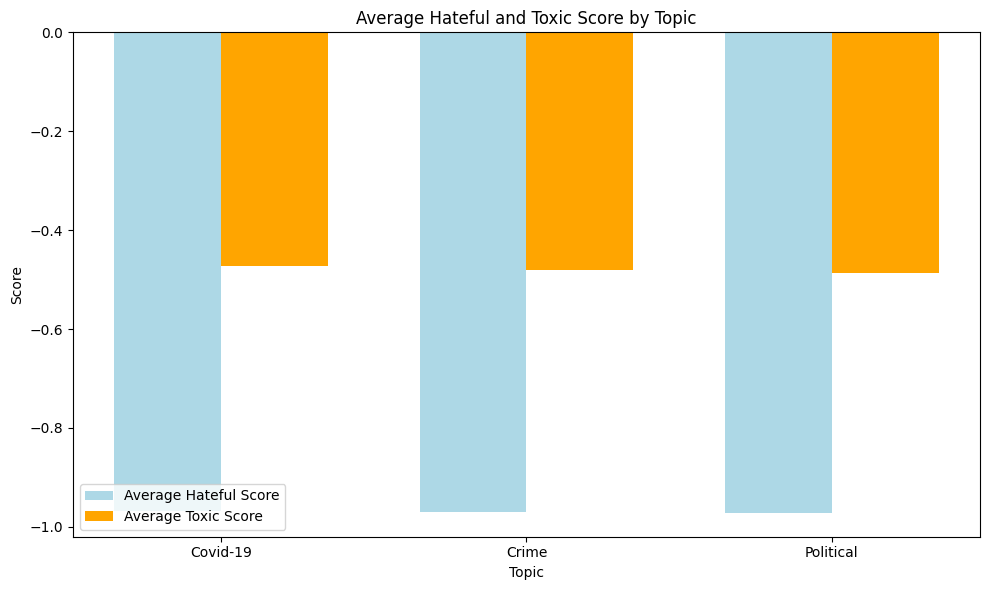

In [67]:
# Set figure size
plt.figure(figsize=(10, 6))

# Define bar width
bar_width = 0.35

# Set positions of the bars on the x-axis
x = np.arange(len(scores))

# Create bars for proportion of hateful and toxic comments
plt.bar(x - bar_width/2, scores['hateful_score'], width=bar_width, label='Average Hateful Score', color='lightblue')
plt.bar(x + bar_width/2, scores['toxic_score'], width=bar_width, label='Average Toxic Score', color='orange')

# Adding labels and title
plt.xlabel('Topic')
plt.ylabel('Score')
plt.title('Average Hateful and Toxic Score by Topic')
plt.xticks(x, proportions['topic'])
plt.legend()

# Show plot
plt.tight_layout()
plt.show()